# N-gram model (bigram and trigram)

This n-gram model was built by bigram model and trigram model using backoff approach.

## Concept

__Note:__ the expression $W_1^{n-1}$ means the string $w_1,w_2,...,w_{n-1}$

Applying **chain rule of probability**:
> $P(X_1...X_n) = P(X_1)P(X_2|X_1)P(X_3|X_1^2)...P(X_n|X_1^{n-1})$  
>= $\displaystyle\prod_{k=1}^{n} P(X_k|X_1^{k-1})$     
*(equation  1)*

Applying **chain rule** to words:
> $P(w_1^n) = P(w_1)P(w_2|w_1)P(w_3|w_1^2)...P(w_n|w_1^{n-1})$  
>= $\displaystyle\prod_{k=1}^{n} P(w_k|w_1^{k-1})$  
*(equation  2)*

The bigram model to predict the condition probability of the next word, use the following approximation:
> $P(w_n|w_1^{n-1})\approx P(w_n|w_{n-1})$  
*(equation  3)*

The general equation for n-gram approximation to the conditional probability of the next word in a sequence is:
> $P(w_n|w_1^{n-1})\approx P(w_n|w_{n-N+1}^{n-1})$   
*(equation  4)*

According to the **equation 4**, the next word in the sentence depends on its immediate past words, known as context words.  
> $P(w_{n} | w_{n-N+1}, w_{n-N},..., w_{n-1})$ where $w_{n-N+1}, w_{n-N},..., w_{n-1}$ is the context words

__Inferred equations for n-grams__:  
> bigram (N=1)  :  $P(w_{n}| w_{n-1})$  
  trigram (N=2) :  $P(w_{n}| w_{n-2}, w_{n-1})$  
  4-gram  (N=3) :  $P(w_{n}| w_{n-3}, w_{n-2})$  

To get the n-gram probabilities, use estilmate probabilities, __maximum likelihood estimation__ (__MLE__), and normalize the counts so the probability can lie between 0 and 1. Here is the example for computing a bigram probability:
> $P(w_n | w_{n-1}) = \frac{C(w_{n-1}w_n)}{\displaystyle\sum_{w}C(w_{n-1}w)} $  
*(equation  5)*

The equation 5 can be simplified. Since the sum of all bigram counts that start with a given word $w_{n-1}$ must be equal to the unigram count for that word $w_{n-1}$:
> $P(w_n | w_{n-1}) = \frac{C(w_{n-1}w_n)}{C(w_{n-1})} $  
*(equation  6)*

__Generalized equations for n-grams__:  
> bigram (N=1)  :  $P(w_{n}| w_{n-1}) = \frac{C(w_{n-1}w_n)}{C(w_{n-1})}$  
  trigram (N=2) :  $P(w_{n}| w_{n-2}, w_{n-1})= \frac{C(w_{n-2}w_{n-1}w_n)}{C(w_{n-2}w_{n-1})}$  
  4-gram  (N=3) :  $P(w_{n}| w_{n-3}, w_{n-2}, w_{n-1})= \frac{C(w_{n-3}w_{n-2}w_{n-1}w_n)}{C(w_{n-3}w_{n-2}w_{n-1})}$  


Reference:[Speech and Language Processing : Chapter 3]

## Code


`bigrams`, `trigrams` are used for creating models. `defaultdict` is for creating a nested dictionary with default value. 
`TweetTokenizer` to tokenize the words and symbols (can be replaced by other tokenizer). `numpy` for plotting the predicted words. `random` for randomly choosing the word with the same probability,

In [1]:
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt
import random

sample review, 5 reviews. Each review is stored in an element of a list.

In [2]:
text_list = ["For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt."
             ,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat ending with skill. ***1/2 from ****"
             , "I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know the children all liked it. There parents also seemed engaged. The death and apparent death of characters brought about the appropriate gasps and comments. Hopefully people realize this movie was made for kids. As such, it was successful although I liked it too. Personally I liked the Scrat!!"
            , "You're using the IMDb.  You've given some hefty votes to some of your favourite films.  It's something you enjoy doing.  And it's all because of this. Fifty seconds. One world ends, another begins.  How can it not be given a ten? I wonder at those who give this a seven or an eight... exactly how could THE FIRST FILM EVER MADE be better? For the record, the long, still opening shot is great showmanship, a superb innovation, perfectly suited to the situation. And the dog on the bike is a lovely touch. All this within fifty seconds.  The word genius is often overused.  THIS is genius."
            , "Made after QUARTET was, TRIO continued the quality of the earlier film versions of the short stories by Maugham. Here the three stories are THE VERGER, MR. KNOW-IT-ALL, and SANITORIUM. The first two are comic (THE VERGER is like a prolonged joke, but one with a good pay-off), and the last more serious (as health issues are involved). Again the author introduces the film and the stories.  James Hayter, soon to have his signature role as Samuel Pickwick, is the hero in THE VERGER. He holds this small custodial-type job in a church, but the new Vicar (Michael Hordern) is an intellectual snob. When he hears Hayter has no schooling he fires him. Hayter has saved some money, so he tells his wife (Kathleen Harrison) he fancies buying a small news and tobacco shop. He has a good eye, and his store thrives. Soon he has a whole chain of stores. When his grandchild is christened by Hordern, the latter is amazed to see how prosperous his ex-Verger. The payoff is when bank manager Felix Aylmer meets with Hayter about diversifying his investments. I'll leave it to you to hear the unintentional but ironic coda of the meeting.  According to Maugham he met a man like Max Kelada (Nigel Patrick) on a cruise. In MR. KNOW-IT-ALL Kelada is a splashy, friendly, and slightly overbearing type from the Middle East who is on a business trip (regarding jewelry) by steamship. His state-room mate is Mr. Grey (the ever quiet and proper Wilfred Hyde-White) who is somewhat, silently disapproving of Max. Max likes to enliven things, and soon is heavily involved in the ship's entertainment. At this point the story actually resembles part of the plot of the non-Maugham story and film CHINA SEAS (1935), as Max makes a bet that he can tell a real piece of jewelry from a fake (after insisting that a piece of jewelry he spotted is real). I won't describe the way Max rises to the occasion.  SANITORIUM is the longest segment. Roland Culver plays ""Ashenden"" (the fictional alter-ego of Maugham - a writer and one time spy as in Hitchcock's THE SECRET AGENT). Here he has to use a sanitorium for a couple of months for his health. He finds a remarkable crew of people, including Jean Simmons as a frail but beautiful young woman, Finlay Currie as an irascible Scotsman, John Laurie as a second irascible Scotsman who is ""at war"" with Currie, Raymond Huntley as a quiet patient who only shows his internal anger at his situation when his wife shows up, and Michael Rennie as a young man who has a serious life threatening illness. Culver watches as three stories among these characters play out to their conclusions. The last, dealing with Simmons and Rennie, is ironic but deeply moving.  It was a dandy follow-up to the earlier QUARTET, and well worth watching."
            , "A favourite of mine,this movie tells of two feuding New York ""characters"", Steve Brodie(Raft) and ""Chuck"" Connors(Beery),who both strive to be the ""Main Guy"" in the Bowery in the late Nineteenth Century.  Brodie(1863-1901) and Connors(1852-1913),were real people,though this is a heavily fictionalized account of their antics(based on a play).Brodie's legendary(did he do it?- it's still a cause of argument!),jump from the Brooklyn bridge(1886),for which he became famous,is shown here as happening around the same time as the Spanish-American war(1898).Director Walsh clearly had a great affection for the period,so beautifully recreated here,and it includes a wild rumbustious ragtime number from saloon singer Trixie Odbray(a young Pert Kelton).Raft is at his slickest as Brodie,and Beery shows again what a clever actor he was,as tough, big hearted, and at times quite touching Connors.Pretty Fay Wray is the love interest both the boys are pursuing.  Full of life and energy,""The Bowery"" moves at a fast pace(unlike many early ""talkies"").It is not an easy movie to find,but is well worth looking out for."
            , "Hood of the Living Dead had a lot to live up to even before the opening credits began. First, any play on ""...of the living dead"" invokes His Holiness Mr. Romero and instantly sets up a high standard to which many movies cannot afford to aspire. And second, my movie-watching companion professed doubt that any urban horror film would surpass the seminal Leprechaun In the Hood. Skeptical, we settled in to watch.   We were rewarded with a surprisingly sincere and good-hearted zombie film. Oh, certainly the budget is low, and of course the directors' amateurs friends populate the cast, but Hood of the Living Dead loves zombie cinema. Cheap? Yeah. But when it's this cheap, you can clearly see where LOVE holds it together.   Ricky works in a lab during the day and as a surrogate parent to his younger brother at night. He dreams of moving out of Oakland. Before this planned escape, however, his brother is shot to death in a drive-by. Ricky's keen scientific mind presents an option superior to CPR or 911: injections of his lab's experimental regenerative formula. Sadly, little bro wakes up in an ambulance as a bloodthirsty Oakland zombie! Chaos and mayhem! I think it's more economical to eat your enemies than take vengeance in a drive-by, but then again, I'm a poor judge of the complexities of urban life. (How poor a judge? In response to a gory scene involving four men, I opined ""Ah-ha! White t-shirts on everyone so the blood shows up. Economical! I used the same technique in my own low-budget horror film."" Jordan replied, ""No, that's gang dress. White t-shirts were banned from New Orleans bars for a time as a result."" Oh.)  A lot of the movie is set in someone's living room, so there's a great deal of hanging out and waiting for the zombies. But the characters are sympathetic and the movie is sincere-- it surpasses its budget in spirit.   Zombie explanation: When man plays God, zombies arise! Or, perhaps: Follow FDA-approved testing rules before human experimentation!   Contribution to the zombie canon: This is the first zombie movie I've seen with a drive-by shooting. As far as the actual zombies go, infection is spread with a bite as usual, but quite unusually head shots don't work-- it's heart shots that kill. Zombies have pulses, the absence of which proves true death. And these zombies make pretty cool jaguar-growl noises.   Gratuitous zombie movie in-joke: A mercenary named Romero. Groan.   Favorite zombie: Jaguar-noise little brother zombie, of course!"
            , "I happen to run into this movie one night so I decided to watch it! I was very pleased with the movie... I thought it was a wonderful plot. It's a great feeling knowing a deceased one has come back and you get that second chance to say what you want to say! And this wife stayed devoted for 23 years!!! I thought it was a great movie!!"
            , "I sit through movies like ""Tiempo de valientes"" and I want to talk about cinema for hours. The admiration this movie caused me is beyond my own limits of explanation, because I'm watching the scenes of the film and I search inside my thoughts for film-making ideas and dialogue innovations that could emerge from something bigger than Damian Szifron's mind.  Looking the environment, so uncompromised, so simple, I'm thinking; this man is a genius. No wonder he created what is probably the best television show Argentina ever witnessed, and then a first movie full of elements some contemporary directors haven't still achieved. ""El fondo del mar"" is the name and, it awakened (a few years ago), my enthusiasm for our everyday cinema.  Starting his journey from people's daily real lives, Szifron goes where Pablo Trapero never could in ""El Bonaerense""; the Federal Police Department's life. Trapero's film was a journey into a man's mind and experiences, not into the places he saw. Yes, there was a detailed training and lots of crime situations, but Szifron in ""in there"", his is more of a detective story, like the ones we know and love, with the mysteries and the thrilling music.  But there's a lot of humanity in his writing, and he shows us his investigation through the eyes of his main characters, Alfredo Díaz and Mariano Silverstein. There are a lot of actors of great caliber in the film, but these two actors are the ones the film can't do without. The first character (Luis Luque) is a detective that has just found out his wife cheats on him; and has to work on a case.  The second one is a psychiatrist that is assigned the treatment of the detective. He wants to deal with him in regular sessions but the sheriff takes advantage of the time disposition and suggests he joins Díaz in his routines: ""It's nothing, the usual stuff; no problem"". But it is bigger than that, and it will unfold a part of the doctor's personality he didn't know.  The relationship developed between the two leads can't be explained unless it is observed, because it regards such a complexity that demonstrates how talented are some men like Szifron that are trying, today, to leave a signature in our history. Reaching points of unbelievable spontaneity, during a high pressure situation, Díaz tells Silverstein: ""How do we continue our treatment?"", and Silverstein answers: ""No, I'm not your doctor. You call me to have dinner; I'm your friend"": we laugh because we can't help it.  And we can't help laughing when Díaz crashes a car in the street and doesn't gives importance to it, or when he trespasses all the red lights in the street, or when he smokes pot in his police patrol and Silverstein can't believe it (but then smokes it too because he's screwed up); or when Silverstein tries to be friendly with Díaz's robber friends. Magic from Diego Peretti is what we receive there. He, a psychiatrist himself, gives a performance in plan ""Locas de amor"", but impresses with all his range. Luis Luque on the other hand, is back on track with a top-notch portrayal that reminds us the great actor he is.  There's a passion I have for this, and as I said, I could write about it for hours, but unfortunately that's not the way it works and I have to be precise and summarize. Although I have to watch a lot of the old movies and study them, I could assure that ""Tiempo de valientes"" is the comedy Argentina had been waiting for and never gotUntil now."
            , "Caught the tail end of this movie channel surfing through the cable movie channels, and was so intrigued I sought out the next showing.  I really didn't know what to expect after reading the program summary, but I came away from this movie feeling quite disturbed and distressed. It also gave me as adult who attended high school in the 80's, a little better insight into what our kids have to contend with these days.  The fact that you don't see the shooting only adds to the chillness of the plot. To see both child and adult alike struggle to comprehend and come to terms with the senseless shootings was at times overwhelming. And will admit that I shed quite a few tears throughout.  On the whole, not a movie that I would seek out to what, however I am sure glad I did see it."]

tokenize the text by review (sentence)

In [3]:
%%time
tokenizer = TweetTokenizer()  # tokenizer can be changed
sentences_tokens = [tokenizer.tokenize(text) for text in text_list]

Wall time: 8.98 ms


In [4]:
# Check the number of sentences words in a list
len(sentences_tokens)

10

create a function to build a default dictionary. It is used for saving the model with `dill` library

In [5]:
def default_dict():
    return defaultdict(int)

create a function to build a bigram model

In [6]:
def build_bigram_model():
    bigram_model = defaultdict(default_dict)  # create a model mold
    for sentence in sentences_tokens: # in every sentence
        clean_sentence = [word.lower() for word in sentence if word.isalpha()] #get alpha only
        # Collect all bigrams counts for (w1, w2)
        for w1, w2 in bigrams(clean_sentence):
            bigram_model[w1][w2] += 1
            
    # compute the probability  
    for w1 in bigram_model:
        # total count of bigram containing w1
        total_count =float(sum(bigram_model[w1].values()))
        # calcualte the probability for all bigrams starting with w1
        for w2 in bigram_model[w1]:
            bigram_model[w1][w2] /= total_count
    return bigram_model

create a function to predict next word based on bigram model and return a chart of predicted words

In [7]:
def bigram_predict_next_word_chart(first_word):
    second_word = bigram_model[first_word]
    # get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)
    predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))
    
    plt.bar(x_pos, probability_score, align='center')
    for i in range(len(x_pos)):
        plt.text(x = i - 0.45 , y = probability_score[i], 
             s = round(probability_score[i], 3))
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted words')
    plt.title(f'Predicted words for "{first_word}" with Bigram model')
    plt.show()

In [8]:
%%time
# create a bigram model
bigram_model = build_bigram_model()

Wall time: 3.99 ms


In [9]:
bigram_model['movie']

defaultdict(int,
            {'that': 0.09523809523809523,
             'where': 0.047619047619047616,
             'filled': 0.047619047619047616,
             'is': 0.14285714285714285,
             'with': 0.047619047619047616,
             'theatre': 0.047619047619047616,
             'was': 0.047619047619047616,
             'tells': 0.047619047619047616,
             'to': 0.047619047619047616,
             'seen': 0.047619047619047616,
             'a': 0.047619047619047616,
             'one': 0.047619047619047616,
             'i': 0.047619047619047616,
             'caused': 0.047619047619047616,
             'full': 0.047619047619047616,
             'channel': 0.047619047619047616,
             'channels': 0.047619047619047616,
             'feeling': 0.047619047619047616})

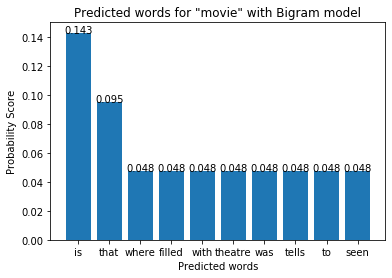

In [10]:
bigram_predict_next_word_chart('movie')

create a function that return a word that was predicted by the bigram model

In [11]:
def bigram_predict_next_word(firstword):
    if len(bigram_model[firstword])== 0:
        return None
    else:
        second_word = bigram_model[firstword]
        # get the top 10 words whose first word is 'first_word'
        top10words = Counter(second_word).most_common(10)
        predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
        return predicted_words[0] # return the top words, currently cannot solve the words with same probability

In [12]:
bigram_predict_next_word('movie')

'is'

In [13]:
# it returns None because there is no next word for the word,'hi'
bigram_predict_next_word('hi')

Create function to build a trigram model 

In [14]:
def build_trigram_model():
    trigram_model = defaultdict(default_dict)  # create a model mold
    for sentence in sentences_tokens: # in every sentence
        clean_sentence = [word.lower() for word in sentence if word.isalpha()] #get alpha only
        # Collect all bigrams counts for (w1, w2)
        for w1, w2, w3 in trigrams(clean_sentence):
            trigram_model[(w1, w2)][w3] += 1
            
    # compute the probability
    for w1_w2 in trigram_model:
        # total count of trigram containing w1, w2
        trigram_total_count = float(sum(trigram_model[w1_w2].values()))
        for w3 in trigram_model[w1_w2]:
            trigram_model[w1_w2][w3] /= trigram_total_count
    return trigram_model

create a function to predict next word based on trigram model and return a chart of predicted words

In [15]:
def trigram_predict_next_word_chart(two_words):
    first_word, second_word = two_words.split()
   # get the next word dict for the given 1st, 2nd word
    next_word = trigram_model[(first_word, second_word)]
    
    # Get top 10 words whose first two words are first_word and second_word
    top10words = Counter(next_word).most_common(10)
    
    if(len(top10words) > 0):
        predicted_words = list(zip(*top10words))[0]
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
   
        plt.bar(x_pos, probability_score, align='center')
        for i in range(len(x_pos)):
            plt.text(x = i - 0.25 , y = probability_score[i], 
                 s = round(probability_score[i], 3))
        plt.xticks(x_pos, predicted_words)
        plt.ylabel('Probability Score')
        plt.xlabel('Predicted Words')
        plt.title(f'Predicted words for "{first_word} {second_word}" with Trigram model')
        plt.show()
    else:
        print(f'There is no predicted word for "{first_word} {second_word}" with Trigram model')

Build the trigram model

In [16]:
%%time
trigram_model = build_trigram_model()

Wall time: 4.99 ms


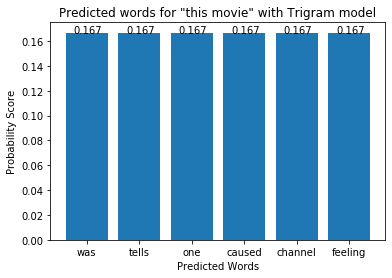

In [17]:
trigram_predict_next_word_chart('this movie')

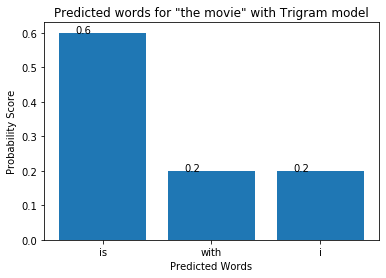

In [18]:
trigram_predict_next_word_chart('the movie')

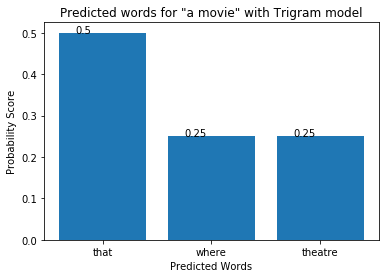

In [19]:
trigram_predict_next_word_chart('a movie')

In [20]:
trigram_predict_next_word_chart('that movie')

There is no predicted word for "that movie" with Trigram model


In [21]:
# there is no next word for two preceding words,'comedy movie'
trigram_predict_next_word_chart('comedy movie')

There is no predicted word for "comedy movie" with Trigram model


### Combing trigram and bigram for next word prediction
create a function that returns a word predicted by the trigram model;  
if there is no combination in trigram model, backoff to the bigram model;  
if there is no combination in bigram model, return none.  

In [22]:
def trigram_predict_next_word(two_words):
    first_word, second_word = two_words.split()
    if len(trigram_model[(first_word, second_word)])== 0:
        return bigram_predict_next_word(second_word)
    else:
        next_word = trigram_model[(first_word, second_word)]
        # get the top 10 words whose first word is 'first_word'
        top10words = Counter(next_word).most_common(10)
        predicted_words = list(zip(*top10words))[0] #unpack the list to words/prob
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
        return predicted_words[0] # return the top words, currently cannot solve the words with same probability

In [23]:
trigram_predict_next_word('a movie')

'that'

In [24]:
trigram_predict_next_word('comedy movie')

'is'

In [25]:
trigram_predict_next_word('that movie')

'is'

In [26]:
# return None because there is no next word for two preceding words,'movie hi'
trigram_predict_next_word("movie hi")

# Save and load model

The n-gram model has high computation cost. To increase the efficiency, the model should be save after it has been trained.

In [27]:
# pip install dill==0.2.7.1

save the model

In [28]:
import dill
with open('trigram_model.p', 'wb') as file:
    dill.dump(trigram_model, file, protocol=dill.HIGHEST_PROTOCOL)
    
with open('bigram_model.p', 'wb') as file:
    dill.dump(bigram_model, file, protocol=dill.HIGHEST_PROTOCOL)

Load the model

In [29]:
#with open('bigram_model.p', 'rb') as file:
#    bigram_model = dill.load(file)
#with open('bigram_model.p', 'rb') as file:
#    trigram_model = dill.load(file)